 ## ==================== **PROJECT - Supervised ML** ====================

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV ,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## **Load dataset & Understand**

In [2]:
df =  pd.read_csv('Loan_Approval_Prediction_Dataset.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Amount_Term_Months,Interest_Rate,Existing_Monthly_Debt,DTI_Ratio,Loan_Status,Property_Area
0,LN-000001,Male,Married,0,Master,Part-time,29297,467.0,59742,180,9.12,385,0.408,Rejected,Semi-Urban
1,LN-000002,Female,Married,0,Bachelor,Full-time,114110,354.0,559413,360,10.92,2994,0.872,Rejected,Semi-Urban
2,LN-000003,Female,Single,0,Bachelor,Full-time,80446,554.0,358168,360,8.94,2258,0.764,Rejected,Rural
3,LN-000004,Female,Married,3+,Bachelor,Full-time,80546,833.0,226985,360,3.03,1231,0.327,Approved,Rural
4,LN-000005,Male,Single,0,Bachelor,Full-time,278156,NaN,1008368,360,5.14,5304,0.466,Rejected,Rural


In [3]:
df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Amount_Term_Months,Interest_Rate,Existing_Monthly_Debt,DTI_Ratio,Loan_Status,Property_Area
54997,LN-054998,Female,Single,0,Bachelor,Contract,44321,513.0,103489,360,9.45,94,0.260,Rejected,Semi-Urban
54998,LN-054999,Female,Married,0,High School,Full-time,42464,378.0,76988,360,10.90,7,0.208,Rejected,Semi-Urban
54999,LN-055000,NaN,Married,1,Bachelor,Full-time,115537,446.0,289323,240,10.33,3554,0.666,Rejected,Semi-Urban


In [4]:
df.shape

(55000, 15)

In [5]:
df.size

825000

In [6]:
df.dtypes

Loan_ID                     object
Gender                      object
Married                     object
Dependents                  object
Education                   object
Employment_Type             object
Annual_Income                int64
Credit_Score               float64
Loan_Amount                  int64
Loan_Amount_Term_Months      int64
Interest_Rate              float64
Existing_Monthly_Debt        int64
DTI_Ratio                  float64
Loan_Status                 object
Property_Area               object
dtype: object

In [7]:
df.describe()

,Annual_Income,Credit_Score,Loan_Amount,Loan_Amount_Term_Months,Interest_Rate,Existing_Monthly_Debt,DTI_Ratio
count,5.500000e+04,52250.000000,5.500000e+04,55000.000000,55000.000000,55000.000000,55000.000000
mean,9.990894e+04,583.349033,3.090519e+05,306.342545,7.718284,1447.046691,0.512566
std,1.650973e+05,158.758295,3.921701e+05,86.517907,2.834660,1382.630284,0.179604
min,5.175000e+03,301.000000,8.569000e+03,120.000000,3.000000,0.000000,0.088000
25%,4.899575e+04,447.000000,1.422535e+05,240.000000,5.290000,507.000000,0.381000
50%,7.349950e+04,583.000000,2.278980e+05,360.000000,7.680000,1075.000000,0.503000
75%,1.107742e+05,720.000000,3.671968e+05,360.000000,10.120000,1949.000000,0.629000
max,9.278490e+06,850.000000,1.491389e+07,360.000000,13.650000,20953.000000,1.224000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

Loan_ID                       0
Gender                     2750
Married                    2750
Dependents                 2750
Education                  2801
Employment_Type            2750
Annual_Income                 0
Credit_Score               2750
Loan_Amount                   0
Loan_Amount_Term_Months       0
Interest_Rate                 0
Existing_Monthly_Debt         0
DTI_Ratio                     0
Loan_Status                   0
Property_Area                 0
dtype: int64

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Employment_Type', 'Annual_Income', 'Credit_Score', 'Loan_Amount',
       'Loan_Amount_Term_Months', 'Interest_Rate', 'Existing_Monthly_Debt',
       'DTI_Ratio', 'Loan_Status', 'Property_Area'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  55000 non-null  object 
 1   Gender                   52250 non-null  object 
 2   Married                  52250 non-null  object 
 3   Dependents               52250 non-null  object 
 4   Education                52199 non-null  object 
 5   Employment_Type          52250 non-null  object 
 6   Annual_Income            55000 non-null  int64  
 7   Credit_Score             52250 non-null  float64
 8   Loan_Amount              55000 non-null  int64  
 9   Loan_Amount_Term_Months  55000 non-null  int64  
 10  Interest_Rate            55000 non-null  float64
 11  Existing_Monthly_Debt    55000 non-null  int64  
 12  DTI_Ratio                55000 non-null  float64
 13  Loan_Status              55000 non-null  object 
 14  Property_Area         

In [12]:
df["Loan_Status"].value_counts()

Loan_Status
Rejected    41750
Approved    13250
Name: count, dtype: int64

In [13]:
#seperate the float & intiger columns, change float64-float32,in64-int32
#for memory saving/ memory efficiency

df=df.astype({col:'float32' for col in df.select_dtypes(['float64']).columns})
df=df.astype({col:'int32' for col in df.select_dtypes(['int64']).columns})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  55000 non-null  object 
 1   Gender                   52250 non-null  object 
 2   Married                  52250 non-null  object 
 3   Dependents               52250 non-null  object 
 4   Education                52199 non-null  object 
 5   Employment_Type          52250 non-null  object 
 6   Annual_Income            55000 non-null  int32  
 7   Credit_Score             52250 non-null  float32
 8   Loan_Amount              55000 non-null  int32  
 9   Loan_Amount_Term_Months  55000 non-null  int32  
 10  Interest_Rate            55000 non-null  float32
 11  Existing_Monthly_Debt    55000 non-null  int32  
 12  DTI_Ratio                55000 non-null  float32
 13  Loan_Status              55000 non-null  object 
 14  Property_Area         

###### numerical columns & categorical columns : present missing values

## **EDA**

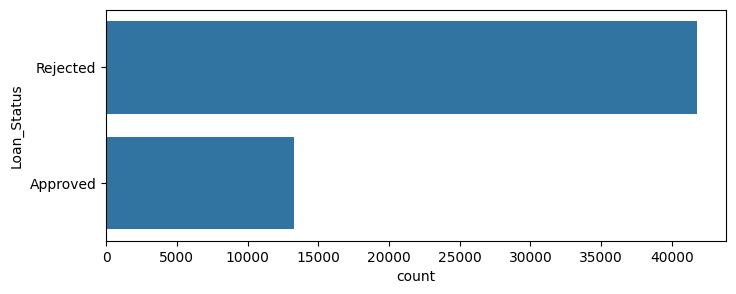

In [19]:
plt.figure(figsize=(8,3))
sns.countplot(df["Loan_Status"])
plt.show()

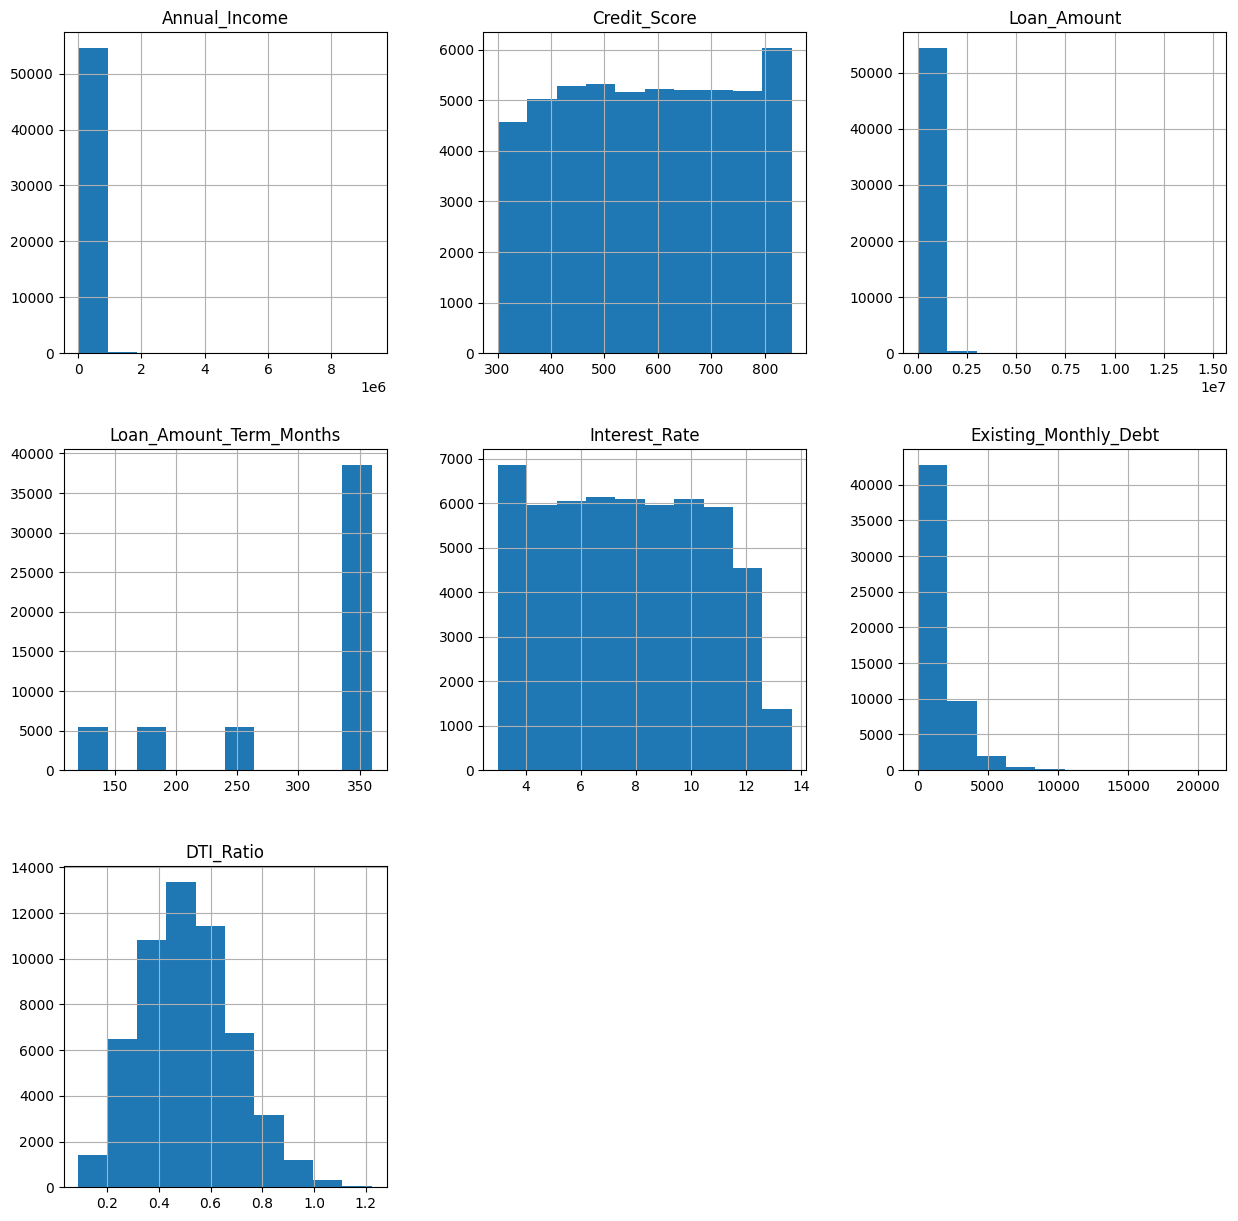

In [20]:
#numerical_col
df.hist(figsize=(15,15))
plt.show()

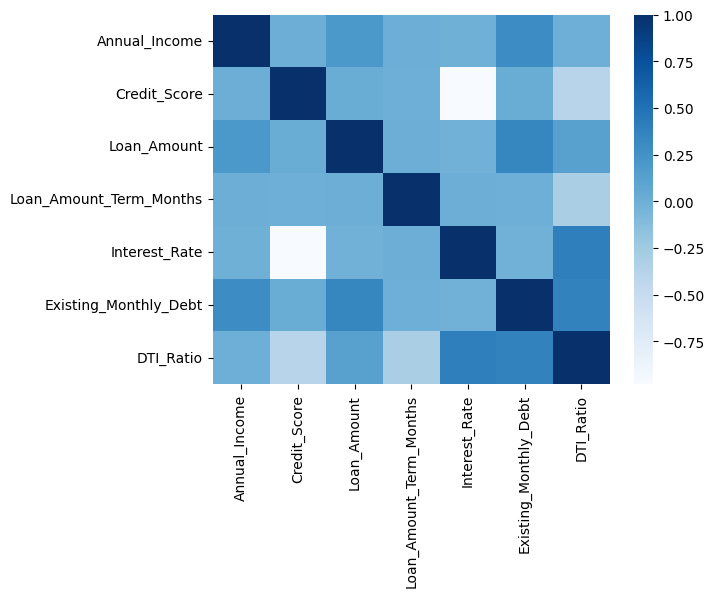

In [21]:
#heatmap
correlation=df.select_dtypes(['number']).corr()
sns.heatmap(correlation,cmap='Blues')
plt.show()

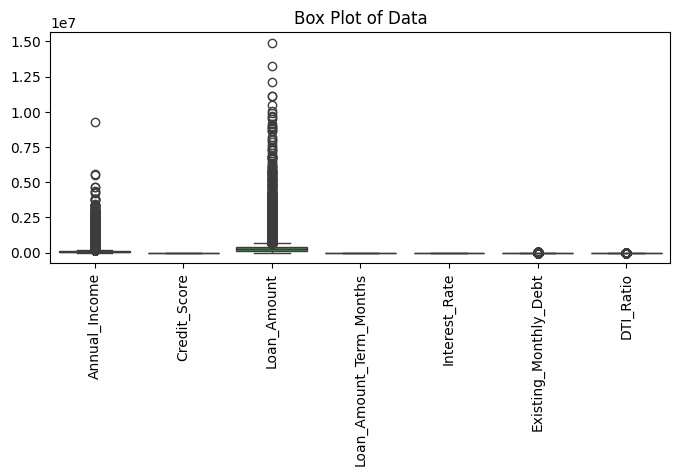

In [27]:
plt.figure(figsize=(8,3))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Box Plot of Data')
plt.show()

Gender             2750
Married            2750
Dependents         2750
Education          2801
Employment_Type    2750
Credit_Score       2750
dtype: int64


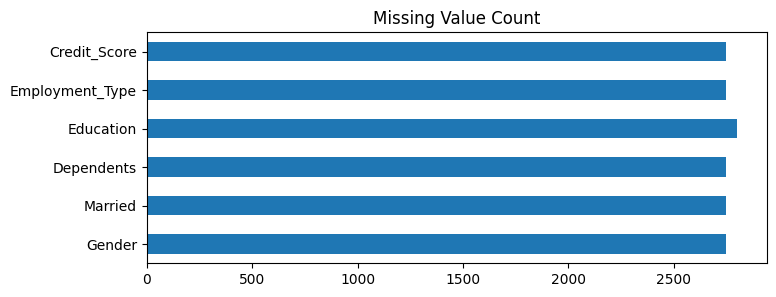

In [28]:
#null values;
null_col=df.isnull().sum()
null_col=null_col[null_col>0]
print(null_col)

#plotting the columns've missing values;
plt.figure(figsize=(8,3))
null_col.plot(kind='barh')
plt.title('Missing Value Count')
plt.show()

## **Data Preprocessing**

In [32]:
#handle null values;

null_col.index

Index(['Gender', 'Married', 'Dependents', 'Education', 'Employment_Type',
       'Credit_Score'],
      dtype='object')

In [33]:
df['Gender']=df['Gender'].fillna(df['Gender'].ffill())
df['Married']=df['Married'].fillna(df['Married'].ffill())
df['Dependents']=df['Dependents'].fillna(df['Dependents'].ffill())
df['Education']=df['Education'].fillna(df['Education'].ffill())
df['Employment_Type']=df['Employment_Type'].fillna(df['Employment_Type'].ffill())
df['Credit_Score']=df['Credit_Score'].fillna(df['Credit_Score'].median())

df.isna().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Employment_Type            0
Annual_Income              0
Credit_Score               0
Loan_Amount                0
Loan_Amount_Term_Months    0
Interest_Rate              0
Existing_Monthly_Debt      0
DTI_Ratio                  0
Loan_Status                0
Property_Area              0
dtype: int64

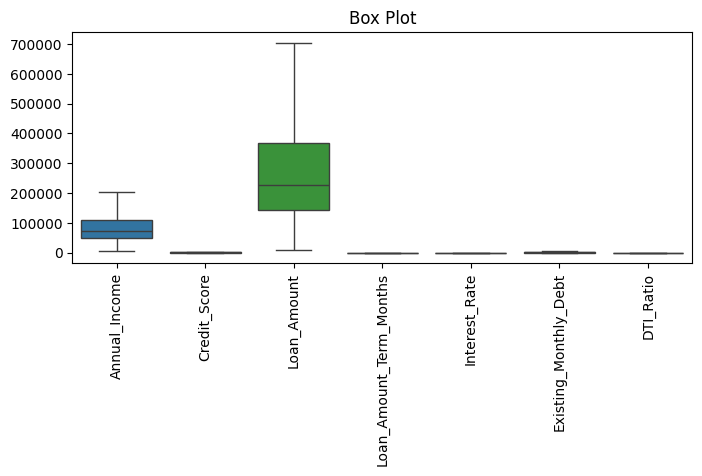

In [34]:
#outlier handling

outliers=['Annual_Income','Loan_Amount','Existing_Monthly_Debt','DTI_Ratio']


for i in outliers:
      Q1=df[i].quantile(0.25)
      Q3=df[i].quantile(0.75)
      IQR=Q3-Q1
      low_lim=Q1-(1.5*IQR)
      upp_lim=Q3+(1.5*IQR)
      df.loc[(df[i]>=upp_lim),i]=upp_lim
      df.loc[(df[i]<=low_lim),i]=low_lim
       
#plotting;
plt.figure(figsize=(8,3))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Box Plot')
plt.show()

In [35]:
df=df.drop(columns=['Loan_ID'])

## **Encoding** 

In [36]:
categorical_col=df.select_dtypes(['object','category'])
categorical_col.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Employment_Type',
       'Loan_Status', 'Property_Area'],
      dtype='object')

In [37]:
#encoding with labelEncode()

le1=LabelEncoder()
df['Gender']=le1.fit_transform(df['Gender'])
                               
le2=LabelEncoder()
df['Married']=le2.fit_transform(df['Married'])

le3=LabelEncoder()
df['Dependents']=le3.fit_transform(df['Dependents'])

le4=LabelEncoder()
df['Education']=le4.fit_transform(df['Education'])

le5=LabelEncoder()
df['Employment_Type']=le5.fit_transform(df['Employment_Type'])

le6=LabelEncoder()
df['Loan_Status']=le6.fit_transform(df['Loan_Status'])

le7=LabelEncoder()
df['Property_Area']=le7.fit_transform(df['Property_Area'])


df.head(5)

,Gender,Married,Dependents,Education,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Amount_Term_Months,Interest_Rate,Existing_Monthly_Debt,DTI_Ratio,Loan_Status,Property_Area
0,1,1,0,3,2,29297,467.0,59742.000,180,9.12,385,0.408,1,1
1,0,1,0,1,1,114110,354.0,559413.000,360,10.92,2994,0.872,1,1
2,0,2,0,1,1,80446,554.0,358168.000,360,8.94,2258,0.764,1,0
3,0,1,3,1,1,80546,833.0,226985.000,360,3.03,1231,0.327,0,0
4,1,2,0,1,1,203442,583.0,704611.625,360,5.14,4112,0.466,1,0


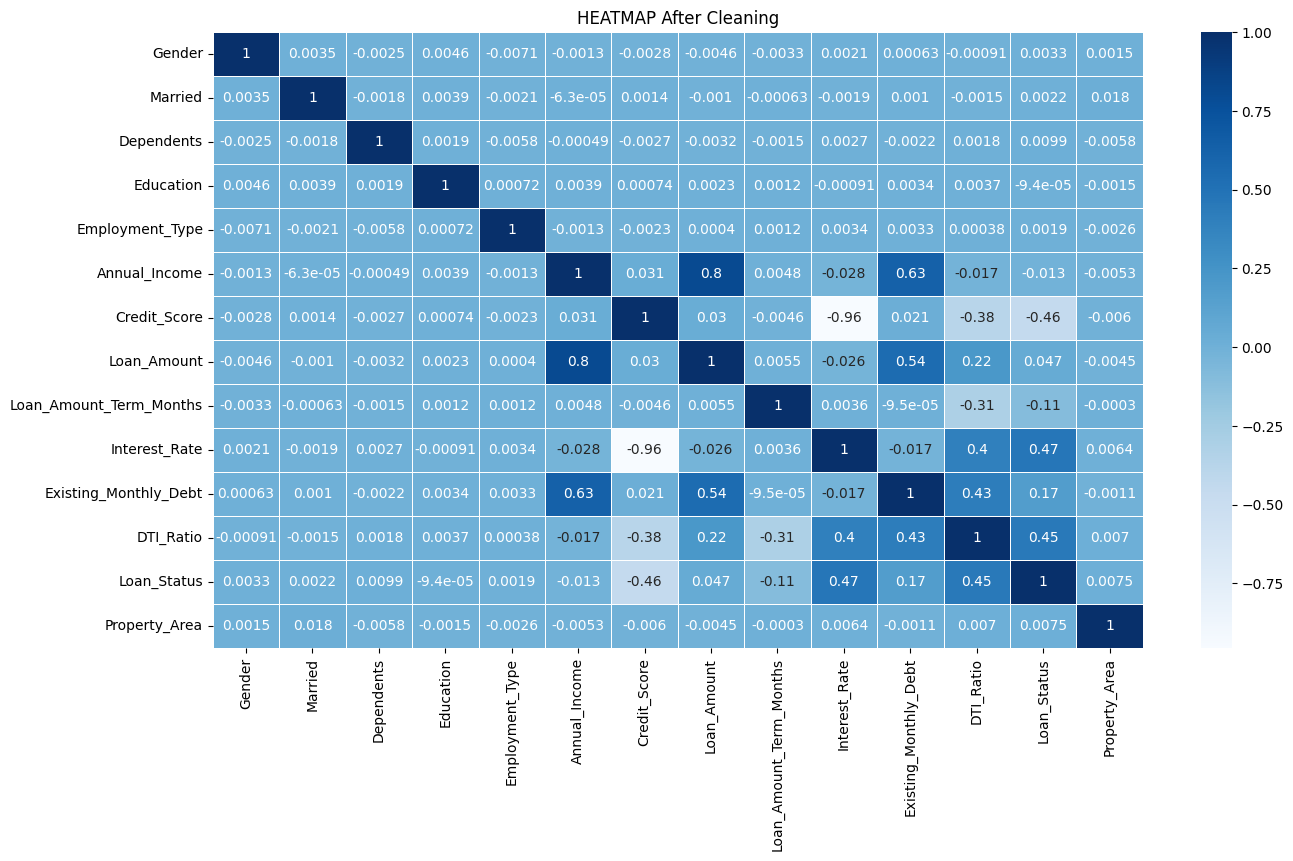

In [38]:
corr=df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,linewidth=0.5,cmap='Blues')
plt.title('HEATMAP After Cleaning')
plt.show()

### **Data Splitting (features,target)**

In [39]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [40]:
#features columns
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Employment_Type',
       'Annual_Income', 'Credit_Score', 'Loan_Amount',
       'Loan_Amount_Term_Months', 'Interest_Rate', 'Existing_Monthly_Debt',
       'DTI_Ratio', 'Property_Area'],
      dtype='object')

## **Scaling**

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 0.77672204, -0.48255996, -0.72183345, ..., -0.88916636,
        -0.58380128,  0.00521669],
       [-0.9761692 , -0.48255996, -0.72183345, ...,  1.46296593,
         2.01619443,  0.00521669],
       [-0.9761692 ,  1.08326881, -0.72183345, ...,  0.79942842,
         1.41102311, -1.22092783],
       ...,
       [-0.9761692 ,  1.08326881, -0.72183345, ..., -1.15151611,
        -1.4131103 ,  0.00521669],
       [-0.9761692 , -0.48255996, -0.72183345, ..., -1.22995057,
        -1.70448906,  0.00521669],
       [-0.9761692 , -0.48255996,  0.23405319, ...,  1.96783143,
         0.86188612,  0.00521669]], shape=(55000, 13))

## **train_test_split**

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(41250, 13)
(13750, 13)
(41250,)
(13750,)


In [44]:
x_train

array([[ 0.77672204,  1.08326881, -0.72183345, ...,  1.02391326,
         0.45283498, -1.22092783],
       [-0.9761692 ,  1.08326881,  2.14582645, ...,  0.14220173,
        -0.35406023,  1.2313612 ],
       [ 2.52961328, -0.48255996, -0.72183345, ..., -0.26709994,
        -0.23078465, -1.22092783],
       ...,
       [ 0.77672204, -0.48255996,  1.18993982, ...,  1.64868431,
         0.39119728, -1.22092783],
       [-0.9761692 , -0.48255996, -0.72183345, ...,  2.4681892 ,
         0.78343798,  1.2313612 ],
       [ 0.77672204, -0.48255996, -0.72183345, ..., -0.76655617,
        -0.25319829, -1.22092783]], shape=(41250, 13))

In [45]:
#add all train_test_score before hyperparametertuning
Actual_models_scores=[]

### **1.logisticRegression**

In [46]:
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=Lr.predict(x_test)
y_pred_t=Lr.predict(x_train)
Train_Score_lr=accuracy_score(y_train,y_pred_t)
Test_Score_lr=accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_lr)
print("Test_Score:",Test_Score_lr)

Traing_Score: 0.8728242424242424
Test_Score: 0.8675636363636363


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.63      0.70      3303
           1       0.89      0.94      0.92     10447

    accuracy                           0.87     13750
   macro avg       0.83      0.79      0.81     13750
weighted avg       0.86      0.87      0.86     13750



In [49]:
l={'model':'LogisticRegression','Train_score':Train_Score_lr,'Test_score':Test_Score_lr}
Actual_models_scores.append(l)

### **2.RandomForestClssifier**

In [50]:
rf= RandomForestClassifier(n_estimators=47, random_state=34)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=47, random_state=34)

In [51]:
y_pred=rf.predict(x_test)
y_pred_t=rf.predict(x_train)
Train_Score_rf=accuracy_score(y_train,y_pred_t)
Test_Score_rf=accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_rf)
print("Test_Score:",Test_Score_rf)

Traing_Score: 0.9992
Test_Score: 0.9213818181818182


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      3303
           1       0.93      0.97      0.95     10447

    accuracy                           0.92     13750
   macro avg       0.91      0.87      0.89     13750
weighted avg       0.92      0.92      0.92     13750



In [53]:
r={'model':'RandomForestClassifier','Train_score':Train_Score_rf,'Test_score':Test_Score_rf}
Actual_models_scores.append(r)

### **3.DecisionTreeClassifier**

In [54]:
d = DecisionTreeClassifier(max_depth=3)
d.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
y_pred=d.predict(x_test)
y_pred_t=d.predict(x_train)
Train_Score_d = accuracy_score(y_train,y_pred_t)
Test_Score_d = accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_d)
print("Test_Score:",Test_Score_d)

Traing_Score: 0.9243636363636364
Test_Score: 0.9211636363636364


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      3303
           1       0.93      0.97      0.95     10447

    accuracy                           0.92     13750
   macro avg       0.91      0.87      0.89     13750
weighted avg       0.92      0.92      0.92     13750



In [57]:
dc={'model':'DecisionTreeClassifier','Train_score':Train_Score_d,'Test_score':Test_Score_d}
Actual_models_scores.append(dc)

### **4.KNN**

In [58]:
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [59]:
y_pred=knn.predict(x_test)
y_pred_t=knn.predict(x_train)
Train_Score_knn= accuracy_score(y_train,y_pred_t)
Test_Score_knn = accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_knn)
print("Test_Score:",Test_Score_knn)

Traing_Score: 0.8961454545454546
Test_Score: 0.8722181818181818


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      3303
           1       0.90      0.93      0.92     10447

    accuracy                           0.87     13750
   macro avg       0.83      0.81      0.82     13750
weighted avg       0.87      0.87      0.87     13750



In [61]:
k={'model':'KNN','Train_score':Train_Score_knn,'Test_score':Test_Score_knn}
Actual_models_scores.append(k)

### **5.SVC**

In [62]:
s=SVC()
s.fit(x_train,y_train)

SVC()

In [63]:
y_pred=s.predict(x_test)
y_pred_t=s.predict(x_train)
Train_Score_svc= accuracy_score(y_train,y_pred_t)
Test_Score_svc = accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_svc)
print("Test_Score:",Test_Score_svc)

Traing_Score: 0.9050909090909091
Test_Score: 0.8963636363636364


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3303
           1       0.91      0.96      0.93     10447

    accuracy                           0.90     13750
   macro avg       0.88      0.82      0.85     13750
weighted avg       0.89      0.90      0.89     13750



In [65]:
s={'model':'SVC','Train_score':Train_Score_svc,'Test_score':Test_Score_svc}
Actual_models_scores.append(s)

### **6.GaussianNB**

In [66]:
GnNB = GaussianNB()
GnNB.fit(x_train,y_train)

GaussianNB()

In [67]:
y_pred=GnNB.predict(x_test)
y_pred_t=GnNB.predict(x_train)
Train_Score_nb= accuracy_score(y_train,y_pred_t)
Test_Score_nb = accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_nb)
print("Test_Score:",Test_Score_nb)

Traing_Score: 0.8346424242424243
Test_Score: 0.8267636363636364


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.79      0.69      3303
           1       0.93      0.84      0.88     10447

    accuracy                           0.83     13750
   macro avg       0.77      0.81      0.78     13750
weighted avg       0.85      0.83      0.83     13750



In [69]:
gb={'model':'GaussianNB','Train_score':Train_Score_nb,'Test_score':Test_Score_nb}
Actual_models_scores.append(gb)

### **7.AdaBoostClassifier**

In [70]:
dt=DecisionTreeClassifier()
ab=AdaBoostClassifier(estimator=dt, n_estimators=400,random_state=2)
ab.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=400,
                   random_state=2)

In [71]:
y_pred=ab.predict(x_test)
y_pred_t=ab.predict(x_train)
Train_Score_ab= accuracy_score(y_train,y_pred_t)
Test_Score_ab = accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_ab)
print("Test_Score:",Test_Score_ab)

Traing_Score: 1.0
Test_Score: 0.8495272727272727


In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3303
           1       0.90      0.90      0.90     10447

    accuracy                           0.85     13750
   macro avg       0.79      0.80      0.80     13750
weighted avg       0.85      0.85      0.85     13750



In [73]:
ab={'model':'AdaBoostClassifier','Train_score':Train_Score_ab,'Test_score':Test_Score_ab}
Actual_models_scores.append(ab)

### **8.GradientBoostingClassifier**

In [74]:
gb = GradientBoostingClassifier(n_estimators=300,learning_rate=0.01,random_state=42)
gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300,
                           random_state=42)

In [75]:
y_pred=gb.predict(x_test)
y_pred_t=gb.predict(x_train)
Train_Score_gb= accuracy_score(y_train,y_pred_t)
Test_Score_gb= accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_gb)
print("Test_Score:",Test_Score_gb)

Traing_Score: 0.9243878787878788
Test_Score: 0.9211636363636364


In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      3303
           1       0.93      0.97      0.95     10447

    accuracy                           0.92     13750
   macro avg       0.91      0.87      0.89     13750
weighted avg       0.92      0.92      0.92     13750



In [77]:
gb={'model':'GradienBosstingClassifier','Train_score':Train_Score_gb,'Test_score':Test_Score_gb}
Actual_models_scores.append(gb)

### **9.XGBClassifier**

In [78]:
xg = XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
y_pred=xg.predict(x_test)
y_pred_t=xg.predict(x_train)
Train_Score_xg= accuracy_score(y_train,y_pred_t)
Test_Score_xg = accuracy_score(y_test,y_pred)
print("Traing_Score:",Train_Score_xg)
print("Test_Score:",Test_Score_xg)

Traing_Score: 0.9324121212121212
Test_Score: 0.9200727272727273


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      3303
           1       0.93      0.97      0.95     10447

    accuracy                           0.92     13750
   macro avg       0.91      0.87      0.89     13750
weighted avg       0.92      0.92      0.92     13750



In [81]:
x={'model':'XGBClassifier','Train_score':Train_Score_xg,'Test_score':Test_Score_xg}
Actual_models_scores.append(x)

In [82]:
ams = pd.DataFrame(Actual_models_scores)
ams

,model,Train_score,Test_score
0,LogisticRegression,0.872824,0.867564
1,RandomForestClassifier,0.999200,0.921382
2,DecisionTreeClassifier,0.924364,0.921164
3,KNN,0.896145,0.872218
4,SVC,0.905091,0.896364
5,GaussianNB,0.834642,0.826764
6,AdaBoostClassifier,1.000000,0.849527
7,GradienBosstingClassifier,0.924388,0.921164
8,XGBClassifier,0.932412,0.920073


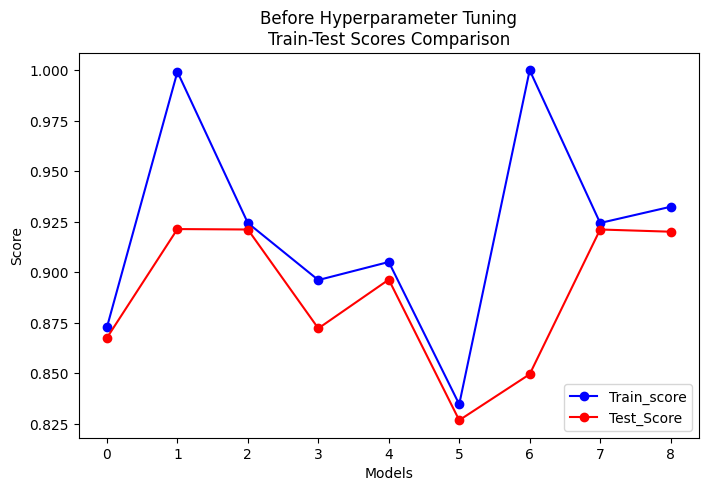

In [85]:
#visually represents;
plt.figure(figsize=(8,5))
plt.plot(ams['Train_score'],'o-b',label='Train_score')
plt.plot(ams['Test_score'],'o-r',label='Test_Score')
plt.title(f'Before Hyperparameter Tuning\nTrain-Test Scores Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

# **OverSampling**

In [86]:
#check the 'Target' is balanced or not.
Counter(df['Loan_Status'])

Counter({1: 41750, 0: 13250})

In [87]:
# To balance the data
os = SMOTE(random_state=2)
x_os,y_os=os.fit_resample(X,y)
y_os.value_counts()

Loan_Status
1    41750
0    41750
Name: count, dtype: int64

In [90]:
#train-test-split

x_train,x_test,y_train,y_test= train_test_split(x_os,y_os,test_size=0.25,random_state=42)
x_train.shape

(62625, 13)

In [91]:
x_test.shape

(20875, 13)

## **HyperparameterTuning**
Using GridSearchCV / RandomizedSearchCV for model building

In [93]:
#Empty list for adding all models of best_scores,best_params
model_collection=[]

In [94]:
#adding all models train_scores, test_score after hyperparametertuning
train_test_score=[]

### **1. LogisticRegression**

In [95]:
#l2=penalty support,solver=['saga'] for big data
#mention in your presentation

LR = LogisticRegression(class_weight='balanced')
params_lr={'penalty':['l1','l2'], 
           'C':[0.5,1,10],
           'solver':['liblinear','saga'],
           'max_iter':[1000,2000,3000,4000],
          }
gscv_lr = GridSearchCV(LR,params_lr,scoring="f1",cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_lr.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.5, 1, 10],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=2)

In [96]:
a={'model':'LogisticRegression','best_score':gscv_lr.best_score_,'best_params':gscv_lr.best_params_}
model_collection.append(a)

In [97]:
gscv_lr.best_score_

np.float64(0.8108300679076)

In [98]:
gscv_lr.best_params_

{'C': 10, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}

In [99]:
lr=LogisticRegression(class_weight='balanced',C=10,max_iter=2000,penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(C=10, class_weight='balanced', max_iter=2000, penalty='l1',
                   solver='liblinear')

In [100]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

train_score_lr=accuracy_score(y_train,y_pred_train)
test_score_lr=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_lr}\nTesting: {test_score_lr}")

====Accuracy Score====
Train: 0.8172614770459082
Testing: 0.8222754491017964


In [101]:
a={'model':'LogisticRegression','Train_score':train_score_lr,'Test_score':test_score_lr}
train_test_score.append(a)

In [102]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83     10393
           1       0.84      0.79      0.82     10482

    accuracy                           0.82     20875
   macro avg       0.82      0.82      0.82     20875
weighted avg       0.82      0.82      0.82     20875



In [103]:
cm=confusion_matrix(y_test,y_pred_test)
print(cm)

[[8865 1528]
 [2182 8300]]


## **2.RandomForestClassifier**

In [104]:
RFC = RandomForestClassifier(class_weight='balanced')
params_rfc={'n_estimators':[100,200,300],
            'max_depth':[10,15,20,None],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'max_features':['sqrt','log2']
           }
rscv_rfc=RandomizedSearchCV(RFC,params_rfc,n_iter=10,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
rscv_rfc.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1', verbose=2)

In [105]:
b={'model':'RandomForestClassifier','best_score':rscv_rfc.best_score_,'best_params':rscv_rfc.best_params_}
model_collection.append(b)

In [106]:
rscv_rfc.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None}

In [107]:
rfc=RandomForestClassifier(class_weight='balanced',n_estimators=200,max_depth=None,max_features='log2',
                           min_samples_split=10,min_samples_leaf=1)
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_split=10, n_estimators=200)

In [108]:
y_pred_train=rfc.predict(x_train)
y_pred_test=rfc.predict(x_test)

train_score_rfc=accuracy_score(y_train,y_pred_train)
test_score_rfc=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_rfc}\nTesting: {test_score_rfc}")

====Accuracy Score====
Train: 0.9618043912175649
Testing: 0.9142514970059881


In [109]:
b={'model':'RandomForestClassifier','Train_score':train_score_rfc,'Test_score':test_score_rfc}
train_test_score.append(b)

In [110]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91     10393
           1       0.88      0.97      0.92     10482

    accuracy                           0.91     20875
   macro avg       0.92      0.91      0.91     20875
weighted avg       0.92      0.91      0.91     20875



In [111]:
print(confusion_matrix(y_test,y_pred_test))

[[ 8967  1426]
 [  364 10118]]


## **3.DecisionTreeClassifier**

In [112]:
DTC = DecisionTreeClassifier(class_weight='balanced')
params_dtc={'criterion':['gini','entropy'],
            'max_depth':[10,15,20,None],
            'min_samples_split':[2,5,10,20],
            'min_samples_leaf':[1,2,5,10],
            'max_features':['sqrt','log2']}
gscv_dtc=GridSearchCV(DTC,params_dtc,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_dtc.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=2)

In [113]:
c={'model':'DecisionTreeClassifier','best_score':gscv_dtc.best_score_,'best_params':gscv_dtc.best_params_}
model_collection.append(c)

In [114]:
gscv_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 20}

In [115]:
gscv_dtc.best_score_

np.float64(0.8883176006981113)

In [116]:
dtc=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=15,max_features='sqrt',
                           min_samples_split=20,min_samples_leaf=5)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=20)

In [117]:
y_pred_train=dtc.predict(x_train)
y_pred_test=dtc.predict(x_test)

train_score_dtc=accuracy_score(y_train,y_pred_train)
test_score_dtc=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_dtc}\nTesting: {test_score_dtc}")

====Accuracy Score====
Train: 0.9030738522954092
Testing: 0.8915928143712575


In [118]:
c={'model':'DecisionTreeClassifier','Train_score':train_score_dtc,'Test_score':test_score_dtc}
train_test_score.append(c)

In [119]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88     10393
           1       0.85      0.95      0.90     10482

    accuracy                           0.89     20875
   macro avg       0.90      0.89      0.89     20875
weighted avg       0.90      0.89      0.89     20875



In [120]:
print(confusion_matrix(y_test,y_pred_test))

[[8661 1732]
 [ 531 9951]]


## **4.KNN**

In [121]:
KNN=KNeighborsClassifier()
params_knn={'n_neighbors':[5,11,21,31,41],
            'weights':['uniform','distance']}
gscv_knn=GridSearchCV(KNN,params_knn,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_knn.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 11, 21, 31, 41],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=2)

In [122]:
d={'model':'KNN','best_score':gscv_knn.best_score_,'best_params':gscv_knn.best_params_}
model_collection.append(d)

In [123]:
gscv_knn.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [124]:
gscv_knn.best_score_

np.float64(0.8619223340190161)

In [125]:
knn=KNeighborsClassifier(n_neighbors=11,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, weights='distance')

In [126]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

train_score_knn=accuracy_score(y_train,y_pred_train)
test_score_knn=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_knn}\nTesting: {test_score_knn}")

====Accuracy Score====
Train: 1.0
Testing: 0.8781317365269461


In [127]:
d={'model':'KNN','Train_score':train_score_knn,'Test_score':test_score_knn}
train_test_score.append(d)

In [128]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89     10393
           1       0.94      0.81      0.87     10482

    accuracy                           0.88     20875
   macro avg       0.88      0.88      0.88     20875
weighted avg       0.88      0.88      0.88     20875



In [129]:
print(confusion_matrix(y_test,y_pred_test))

[[9810  583]
 [1961 8521]]


## **5.SupportVectorClassifier**

In [130]:
SVC=SVC(class_weight='balanced')
params_svc={'C':[0.1,1,10],
            'kernel':['rbf','poly','linear','sigmoid'],
            'gamma':['scale','auto']}
gscv_svc=GridSearchCV(SVC,params_svc,scoring='f1',cv=StratifiedKFold(n_splits=3),n_jobs=-1,verbose=2)
gscv_svc.fit(x_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVC(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='f1', verbose=2)

In [131]:
e={'model':'SVC','best_score':gscv_svc.best_score_,'best_params':gscv_svc.best_params_}
model_collection.append(e)

In [133]:
gscv_svc.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [137]:
svc=SVC(class_weight='balanced',C=10,gamma='scale',kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=10, class_weight='balanced')

In [138]:
y_pred_train=svc.predict(x_train)
y_pred_test=svc.predict(x_test)

train_score_svc=accuracy_score(y_train,y_pred_train)
test_score_svc=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_svc}\nTesting: {test_score_svc}")

====Accuracy Score====
Train: 0.8855568862275449
Testing: 0.8705149700598802


In [139]:
e={'model':'SVC','Train_score':train_score_svc,'Test_score':test_score_svc}
train_test_score.append(e)

In [140]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     10393
           1       0.85      0.91      0.88     10482

    accuracy                           0.87     20875
   macro avg       0.87      0.87      0.87     20875
weighted avg       0.87      0.87      0.87     20875



In [141]:
confusion_matrix(y_test,y_pred_test)

array([[8683, 1710],
       [ 993, 9489]])

## **6.GaussianNB**

In [142]:
GNB=GaussianNB()
params_gnb={'var_smoothing':[1e-09,1e-06,1e-03,1e-01],
            'priors':[None]}
gscv_gnb=GridSearchCV(GNB,params_gnb,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_gnb.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None],
                         'var_smoothing': [1e-09, 1e-06, 0.001, 0.1]},
             scoring='f1', verbose=2)

In [143]:
f={'model':'GaussianNB','best_score':gscv_gnb.best_score_,'best_params':gscv_gnb.best_params_}
model_collection.append(f)

In [144]:
gscv_gnb.best_params_

{'priors': None, 'var_smoothing': 1e-09}

In [145]:
gnb=GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(x_train,y_train)

GaussianNB()

In [146]:
y_pred_train=gnb.predict(x_train)
y_pred_test=gnb.predict(x_test)

train_score_gnb=accuracy_score(y_train,y_pred_train)
test_score_gnb=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_gnb}\nTesting: {test_score_gnb}")

====Accuracy Score====
Train: 0.805061876247505
Testing: 0.8086706586826348


In [147]:
f={'model':'GaussianNB','Train_score':train_score_gnb,'Test_score':test_score_gnb}
train_test_score.append(f)

In [148]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10393
           1       0.85      0.76      0.80     10482

    accuracy                           0.81     20875
   macro avg       0.81      0.81      0.81     20875
weighted avg       0.81      0.81      0.81     20875



In [149]:
confusion_matrix(y_test,y_pred_test)

array([[8939, 1454],
       [2540, 7942]])

## **7.AdaBoostClassifier**

In [150]:
base_stump=DecisionTreeClassifier(class_weight='balanced',max_depth=1)
ABC=AdaBoostClassifier(estimator=base_stump)
params_abc={'n_estimators':[100,200,300],
            'learning_rate':[0.01,0.1,1.0]}

gscv_abc=GridSearchCV(ABC,params_abc,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_abc.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                           max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [151]:
g={'model':'AdaBoostClassifier','best_score':gscv_abc.best_score_,'best_params':gscv_abc.best_params_}
model_collection.append(g)

In [152]:
gscv_abc.best_params_

{'learning_rate': 1.0, 'n_estimators': 300}

In [153]:
base_stump=DecisionTreeClassifier(class_weight='balanced',max_depth=1)
abc=AdaBoostClassifier(estimator=base_stump,learning_rate=1.0,n_estimators=300)
abc.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=1),
                   n_estimators=300)

In [154]:
y_pred_train=abc.predict(x_train)
y_pred_test=abc.predict(x_test)

train_score_abc=accuracy_score(y_train,y_pred_train)
test_score_abc=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_abc}\nTesting: {test_score_abc}")

====Accuracy Score====
Train: 0.877125748502994
Testing: 0.8784191616766467


In [155]:
g={'model':'AdaBoostClassifier','Train_score':train_score_abc,'Test_score':test_score_abc}
train_test_score.append(g)

In [156]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     10393
           1       0.87      0.89      0.88     10482

    accuracy                           0.88     20875
   macro avg       0.88      0.88      0.88     20875
weighted avg       0.88      0.88      0.88     20875



In [157]:
confusion_matrix(y_test,y_pred_test)

array([[9047, 1346],
       [1192, 9290]])

## **8.GradientBoostingClassifier**

In [158]:
GBC=GradientBoostingClassifier()
params_gbc={'criterion':['friedman_mse','squared_error'],
            'n_estimators':[100,200,300],
            'learning_rate':[0.01,0.1,1.0],
            'loss':['log_loss','exponential'],
            'max_features':['sqrt','log2']
           }
gscv_gbc=GridSearchCV(GBC,params_gbc,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_gbc.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [159]:
h={'model':'GradientBoostingClassifier','best_score':gscv_gbc.best_score_,'best_params':gscv_gbc.best_params_}
model_collection.append(h)

In [160]:
gscv_gbc.best_params_

{'criterion': 'squared_error',
 'learning_rate': 1.0,
 'loss': 'exponential',
 'max_features': 'sqrt',
 'n_estimators': 300}

In [161]:
gbc=GradientBoostingClassifier(criterion='squared_error',learning_rate=1.0,loss='exponential',
                               max_features='sqrt',n_estimators=300)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=1.0,
                           loss='exponential', max_features='sqrt',
                           n_estimators=300)

In [162]:
y_pred_train=gbc.predict(x_train)
y_pred_test=gbc.predict(x_test)

train_score_gbc=accuracy_score(y_train,y_pred_train)
test_score_gbc=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_gbc}\nTesting: {test_score_gbc}")

====Accuracy Score====
Train: 0.9317045908183633
Testing: 0.9257005988023952


In [163]:
h={'model':'GradientBoostingClassifier','Train_score':train_score_gbc,'Test_score':test_score_gbc}
train_test_score.append(h)

In [164]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     10393
           1       0.90      0.96      0.93     10482

    accuracy                           0.93     20875
   macro avg       0.93      0.93      0.93     20875
weighted avg       0.93      0.93      0.93     20875



In [165]:
confusion_matrix(y_test,y_pred_test)

array([[ 9312,  1081],
       [  470, 10012]])

## **9.XGBoost**

In [166]:
XGB=XGBClassifier(scale_pos_weight=5)
params_xgb={'learning_rate':[0.01,0.1,1.0],
            'n_estimators':[100,200,300],
            'max_depth':[1,3,5,7],
            'subsample':[0.6,0.8,1.0]
           }
gscv_xgb=GridSearchCV(XGB,params_xgb,scoring='f1',cv=StratifiedKFold(n_splits=5),n_jobs=-1,verbose=2)
gscv_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_po...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=2)

In [167]:
i={'model':'XGBClassifier','best_score':gscv_xgb.best_score_,'best_params':gscv_xgb.best_params_}
model_collection.append(i)

In [168]:
gscv_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

In [169]:
xgb=XGBClassifier(scale_pos_weight=5, learning_rate=0.1,max_depth=7,n_estimators=300, subsample=0.8)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [170]:
y_pred_train=xgb.predict(x_train)
y_pred_test=xgb.predict(x_test)

train_score_xgb=accuracy_score(y_train,y_pred_train)
test_score_xgb=accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score_xgb}\nTesting: {test_score_xgb}")

====Accuracy Score====
Train: 0.9423872255489022
Testing: 0.9275688622754491


In [171]:
i={'model':'XGBClassifier','Train_score':train_score_xgb,'Test_score':test_score_xgb}
train_test_score.append(i)

In [172]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     10393
           1       0.89      0.97      0.93     10482

    accuracy                           0.93     20875
   macro avg       0.93      0.93      0.93     20875
weighted avg       0.93      0.93      0.93     20875



In [173]:
confusion_matrix(y_test,y_pred_test)

array([[ 9181,  1212],
       [  300, 10182]])

### **Model Comparison;**

In [176]:
pd.DataFrame(model_collection)

,model,best_score,best_params
0,LogisticRegression,0.810830,"{'C': 10, 'max_iter': 2000, 'penalty': 'l1', '..."
1,RandomForestClassifier,0.913821,"{'n_estimators': 200, 'min_samples_split': 10,..."
2,DecisionTreeClassifier,0.888318,"{'criterion': 'entropy', 'max_depth': 15, 'max..."
3,KNN,0.861922,"{'n_neighbors': 11, 'weights': 'distance'}"
4,SVC,0.872123,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
5,GaussianNB,0.793646,"{'priors': None, 'var_smoothing': 1e-09}"
6,AdaBoostClassifier,0.874258,"{'learning_rate': 1.0, 'n_estimators': 300}"
7,GradientBoostingClassifier,0.926488,"{'criterion': 'squared_error', 'learning_rate'..."
8,XGBClassifier,0.927674,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti..."


In [177]:
models = pd.DataFrame(train_test_score)
models

,model,Train_score,Test_score
0,LogisticRegression,0.817261,0.822275
1,RandomForestClassifier,0.961804,0.914251
2,DecisionTreeClassifier,0.903074,0.891593
3,KNN,1.000000,0.878132
4,SVC,0.885557,0.870515
5,GaussianNB,0.805062,0.808671
6,AdaBoostClassifier,0.877126,0.878419
7,GradientBoostingClassifier,0.931705,0.925701
8,XGBClassifier,0.942387,0.927569


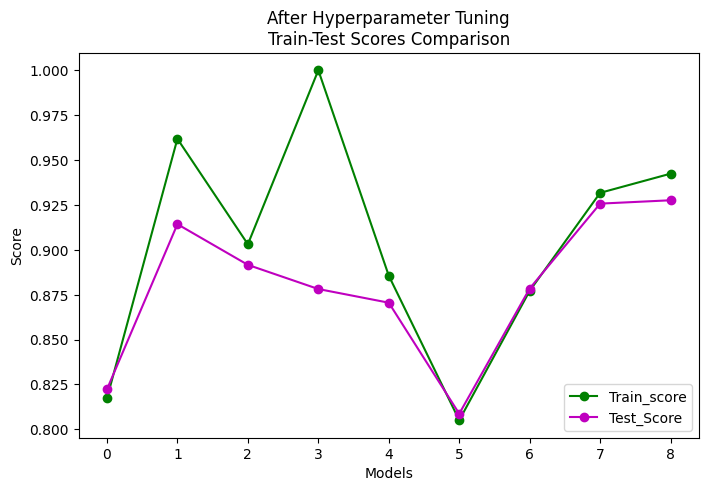

In [178]:
#visually represents;
plt.figure(figsize=(8,5))
plt.plot(models['Train_score'],'o-g',label='Train_score')
plt.plot(models['Test_score'],'o-m',label='Test_Score')
plt.title(f'After Hyperparameter Tuning\nTrain-Test Scores Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.show()

#### **Final Model**

In [180]:
#initialize the final model
#XGBClassifier()

model = xgb

In [183]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

train_score = accuracy_score(y_train,y_pred_train)
test_score = accuracy_score(y_test,y_pred_test)
print("====Accuracy Score====")
print(f"Train: {train_score}\nTesting: {test_score}")

====Accuracy Score====
Train: 0.9423872255489022
Testing: 0.9275688622754491


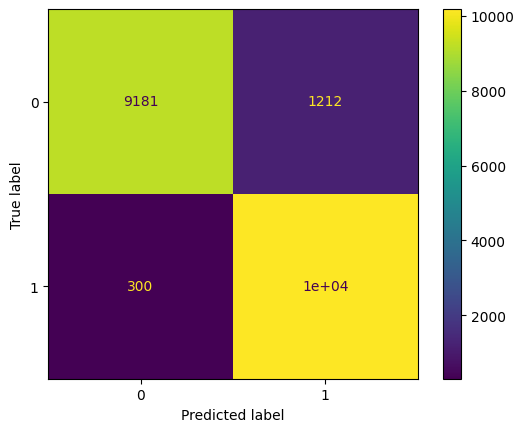

In [184]:
c=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
c.plot()
plt.show()

# **Model Deployment**

In [185]:
import joblib
joblib.dump(model,'C:/Users/HP/Loan_Approval_Prediction_Dataset.pkl')

#encode
joblib.dump(le1,'C:/Users/HP/Le1.pkl')
joblib.dump(le2,'C:/Users/HP/Le2.pkl')
joblib.dump(le3,'C:/Users/HP/Le3.pkl')
joblib.dump(le4,'C:/Users/HP/Le4.pkl')
joblib.dump(le5,'C:/Users/HP/Le5.pkl')
joblib.dump(le6,'C:/Users/HP/Le6.pkl')
joblib.dump(le7,'C:/Users/HP/Le7.pkl')
#scaling
joblib.dump(scaler,'C:/Users/HP/scaler.pkl')


['C:/Users/HP/scaler.pkl']